In [9]:
import pandas as pd
from collections import deque
from keras import layers, models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [28]:
data = pd.read_parquet("Netflix_Prize_data/netflix_data_sample.parquet")

Model: "DQN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 actual_state (InputLayer)   [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                128       
                                                                 
 q_values (Dense)            (None, 100)               6500      
                                                                 
Total params: 6,628
Trainable params: 6,628
Non-trainable params: 0
_________________________________________________________________


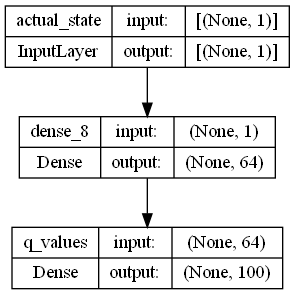

In [15]:

# Capa de entrada para el estado actual (película actual que ve la persona)
### idea: agregar al input el rating actual
input_layer = tf.keras.layers.Input(shape=(1,), name='actual_state')

# Define the hidden layers and output layer
hidden_layer = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(100, activation='linear', name='q_values')(hidden_layer)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='DQN_model')

# Print the summary of the model
model.summary()

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [32]:
data = data[0:100]

In [33]:
def add_max_rating_movie_id(group):
    max_rating_movie_id = group.loc[group['rating'].idxmax(), 'movie_id']
    # Ensure the max_rating_movie_id is not the same as the current movie_id
    group['max_rating_movie_id'] = max_rating_movie_id
    return group

data.groupby(['customer_id', 'date']).apply(add_max_rating_movie_id)


movie_id customer_id  rating        date  \
customer_id date                                                     
10          2002-12-20 0      9340          10       5  2002-12-20   
                       1     14367          10       5  2002-12-20   
                       2       571          10       4  2002-12-20   
                       3      2122          10       4  2002-12-20   
                       4      6972          10       4  2002-12-20   
...                            ...         ...     ...         ...   
            2003-10-07 95     6122          10       3  2003-10-07   
            2003-10-15 96     4641          10       2  2003-10-15   
            2003-10-21 97    16862          10       4  2003-10-21   
            2003-12-04 98     2518          10       4  2003-12-04   
                       99     8603          10       4  2003-12-04   

                          max_rating_movie_id  
customer_id date                               
10          2002-12-20 0                 9340  
                       1                 9340  
                       2                 9340  
                       3                 9340  
                       4                 9340  
...                                       ...  
            2003-10-07 95                6122  
            2003-10-15 96                4641  
            2003-10-21 97               16862  
            2003-12-04 98                2518  
                       99                2518  

[100 rows x 5 columns]

In [36]:
idx = data.groupby(['customer_id', 'date'])['rating'].idxmax()

# Use these indices to get the rows with the maximum ratings
result = data.loc[idx]

In [37]:
result

,movie_id,customer_id,rating,date
0,9340,10,5,2002-12-20
10,7032,10,5,2002-12-27
19,5287,10,4,2002-12-28
22,985,10,5,2002-12-31
34,17628,10,1,2003-01-01
35,5112,10,5,2003-01-03
57,5708,10,3,2003-01-13
58,1542,10,5,2003-02-12
62,2037,10,4,2003-02-13
65,1145,10,3,2003-02-14
